<a href="https://colab.research.google.com/github/aakashkumarme/MLAlgo/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

15 . K-Nearest Neighbors

KNN is often considered a lazy
learner; it doesn’t technically train a model to make predictions. Instead an observation
is predicted to be the class of that of the largest proportion of the k nearest observations.

Problem
You need to find an observation’s k nearest observations (neighbors).

In [3]:
# Load libraries
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
#Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

In [4]:
# Create an observation
new_observation = [ 1, 1, 1, 1]

In [5]:
# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])

In [6]:
# View the nearest neighbors
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

Distance can be thought of as a measure of similarity, so the two closest
observations are the two observation most similar to the observation we created.

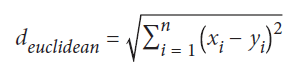

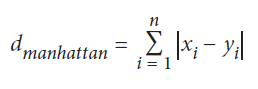

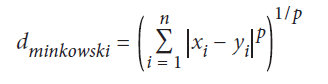

where xi and yi are the two observations we are calculating the distance between.

In [7]:
# Find two nearest neighbors based on euclidean distance
nearestneighbors_euclidean = NearestNeighbors(
n_neighbors=2, metric='euclidean').fit(features_standardized)

In [8]:
# View distances
distances

array([[0.49140089, 0.74294782]])

In addition, we can use kneighbors_graph to create a matrix indicating each observation’s
nearest neighbors:

In [9]:
# Find each observation's three nearest neighbors
# based on euclidean distance (including itself)
nearestneighbors_euclidean = NearestNeighbors(
n_neighbors=3, metric="euclidean").fit(features_standardized)
# List of lists indicating each observation's 3 nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(
features_standardized).toarray()
# Remove 1's marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
 x[i] = 0
# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Problem
Given an observation of unknown class, you need to predict its class based on the
class of its neighbors

In [11]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
X_std = standardizer.fit_transform(X)
# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)
# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
[ 1, 1, 1, 1]]
# Predict the class of two observations
knn.predict(new_observations)

array([1, 2])

In KNN, given an observation, xu, with an unknown target class, the algorithm first
identifies the k closest observations (sometimes called xu’s neighborhood) based on
some distance metric (e.g., Euclidean distance), then these k observations “vote”
based on their class, and the class that wins the vote is xu’s predicted class. More formally,
the probability xu is some class j is: 

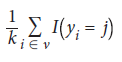

where ν is the k observation in xu’s neighborhood, yi is the class of the ith observation,
and I is an indicator function (i.e., 1 is true, 0 otherwise).



KNeighborsClassifier contains a number of important parameters to consider.

First, metric sets the distance metric used 

Second,n_jobs determines how many of the computer’s cores to use.

Third, algorithm sets the method used to calculate the nearest neighbors.

Fourth, by default KNeighborsClassifier works how we described previously, with each observation in the neighborhood
getting one vote; however, if we set the weights parameter to distance, the closer
observations’ votes are weighted more than observations farther away.

Problem
You want to select the best value for k in a k-nearest neighbors classifier.

In [5]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(
pipe, search_space, cv=5, verbose=0).fit(features_standardized, target)
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]


6

We are trying
to find a balance between bias and variance, and in few places is that as explicit as
the value of k.

If k = n where n is the number of observations, then we have high bias
but low variance. 

If k = 1, we will have low bias but high variance.

Problem
Given an observation of unknown class, you need to predict its class based on the
class of all observations within a certain distance.

In [6]:
# Load libraries
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(
radius=.5, n_jobs=-1).fit(features_standardized, target)
# Create two observations
new_observations = [[ 1, 1, 1, 1]]
# Predict the class of two observations
rnn.predict(new_observations)

array([2])

A less common technique is classification in a radius-based (RNN) classifier where an observation’s class is predicted from the classes of all observations
within a given radius r. 
This is useful tool for identifying outliers.